# Lab 4: Maximum Likelihood Estimate (MLE)

### Introduction

In this lab session we shall have a look at how to use the *Maximum Likelihood Estimate (MLE)* method to estimate the parameters of some model, given some observations $D$.

<font color="red">NOTE: </font>In the notation $\mathcal{N} (\mu, \sigma^2)$ $\mu$ refers to the mean and $\sigma^2$  the variance, not the standard deviation. The standard deviation is $\sigma = \sqrt {\sigma^2}$, i.e. for $\mathcal{N}(0.5, 0.25)$, the standard deviation is $\sigma = 0.5$.

As usual, let's import the libraries before we start by running the cell below.

In [1]:
from __future__ import print_function # to avoid issues between Python 2 and 3 printing

import numpy as np
from scipy import stats
# Necessary to import Axes3D to use `plt.subplots(subplot_kw={'projection': '3d'})`
# as this internally sets up matplotlib for 3D projection, without this import you'll 
# get an error.
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# show matplotlib figures inline
%matplotlib inline

In [2]:
# By default we set figures to be 7"x4" on a 110 dots per inch (DPI) screen 
# (adjust DPI if you have a high res screen!)
plt.rc('figure', figsize=(7, 4), dpi=110)
plt.rc('font', size=10)

## MLE with Python

Here, we write a simple program that calculates $\mu_{\text{ML}}$ using Python.

Let's now load the data from the file `data1.dat` and let's plot the histogram of the data.

(array([2., 1., 5., 9., 8., 8., 8., 4., 2., 3.]),
 array([-0.34415 , -0.144065,  0.05602 ,  0.256105,  0.45619 ,  0.656275,
         0.85636 ,  1.056445,  1.25653 ,  1.456615,  1.6567  ]),
 <BarContainer object of 10 artists>)

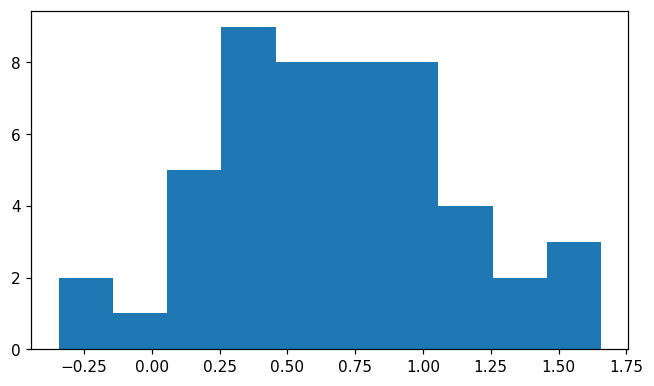

In [4]:
# write your code here
D = np.loadtxt('data1.dat', delimiter=',')
plt.hist(D)

You should now see a histogram approximating a normal distribution. In fact, `data1.data` contains the observations $D$ we talked about above when deriving $\mu_\text{ML}$, which we said we believe follows a normal distribution. 

Write a function `compute_likelihood(D, mu)` that takes a value of $\mu$ and computes $p(D | \mu)$ for the data in `data1.dat`, assuming $\sigma=0.5$.

You may use NumPy's function `np.prod` for the calculation.

In [19]:
# write your code here

def compute_likelihood(D, mu):
    pdf = stats.norm.pdf(D, loc=mu, scale=0.5)
    return pdf.prod()

print(compute_likelihood(D, 0.75))
    

2.534157584536242e-14


Write a function `loop_likelihood(D)` that calls `compute_likelihood` for each value of $\mu \in \{0.00, 0.01, 0.02, \ldots , 1.00\}$, storing *both* the value of $\mu$ and the corresponding obtained likelihood in a 2D array so that the first column contains the value $\mu$ and the second the likelihood $p(D|\mu)$ .

In [31]:
# write your code here
def loop_likelihood(D):
    U = np.arange(0, 1, 0.01)
    P = []
    for u in U:
        P.append([u, compute_likelihood(D, u)])
    return P
loop_likelihood(D)

[[0.0, 8.13741146748026e-34],
 [0.01, 3.102955098186194e-33],
 [0.02, 1.1597885475591305e-32],
 [0.03, 4.249093142425394e-32],
 [0.04, 1.5259060563175121e-31],
 [0.05, 5.371226327954283e-31],
 [0.06, 1.8532466296313074e-30],
 [0.07, 6.2676840470669414e-30],
 [0.08, 2.0777585717378257e-29],
 [0.09, 6.751451932961369e-29],
 [0.1, 2.1503709667687085e-28],
 [0.11, 6.713418266376085e-28],
 [0.12, 2.0544147967282703e-27],
 [0.13, 6.1623544285318554e-27],
 [0.14, 1.8118378266076862e-26],
 [0.15, 5.221629844724643e-26],
 [0.16, 1.4750507130901448e-25],
 [0.17, 4.084340418259242e-25],
 [0.18, 1.1085391173145788e-24],
 [0.19, 2.9491320831520078e-24],
 [0.2, 7.690446144024684e-24],
 [0.21, 1.9657258864483234e-23],
 [0.22, 4.925025562513631e-23],
 [0.23, 1.2095062905130028e-22],
 [0.24, 2.9115341220471074e-22],
 [0.25, 6.869889433326167e-22],
 [0.26, 1.5888822776169327e-21],
 [0.27, 3.6020339750412715e-21],
 [0.28, 8.004201241171722e-21],
 [0.29, 1.7434211238444047e-20],
 [0.3, 3.722208690077208e-

### Questions:

- What is the value of the maximum likelihood $\text{ML} = \max p(D|\mu)$ ? 

- What is $\mu_{\text{ML}} = arg\,max_\mu \, p(D|\mu)$? 

Make sure you understand the difference between the two.

In [38]:
# write your code here
P = np.array(loop_likelihood(D))
max_index = np.argmax(P[:, 1])
arg_max, max_l = P[max_index, :]

print("Mu for maxiumum likelihood = {}".format(arg_max))
print("Maximum likelihood = {}".format(max_l))

Mu for maxiumum likelihood = 0.67
Maximum likelihood = 4.491192371239748e-14


### Visual interpretation

Look at the obtained $\mu_{\text{ML}}$ and at the previously plotted histogram. Can you see any relationship between the obtained value and the histogram?

Let's now plot $\mu$ against $p(D|\mu)$, using the $\mu$ values you used to compute the likelihoods. Plot also a vertical line located at $\mu_{\text{ML}}$. Where does this line lie? Is it a meaningful position?

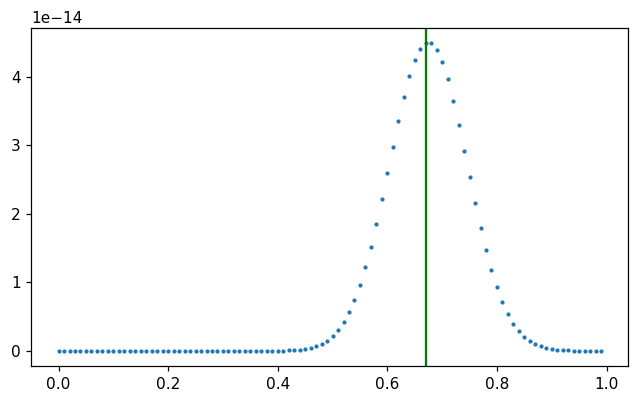

In [51]:
# write your code here
plt.scatter(P[:, 0], P[:, 1], s=3)
plt.axvline(x = arg_max, color = 'g')

### Comparison with MLE recipe

Now implement the analytic MLE result, $\mu_\text{ML} = \frac{1}{n}\sum_i d_i$, to find the value of $\mu_{ML}$ (note that this should be just one line of code!).

Compare this value with that obtained previously. Do the values match? 

In [55]:
# write your code here
u_ml = (1 / len(D)) * np.sum(D)
print("MLE statistically: {}".format(arg_max))
print("MLE analytically: {}".format(u_ml))

MLE statistically: 0.67
MLE analytically: 0.6742339399999999


In [ ]:
# write your code here